In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
#dane z kaggle.com/c/dogs-vs-cats/dataset

In [13]:
original_dataset_dir = '/Users/pstrz/Downloads/dogs_cats' 

base_dir = '/Users/pstrz/Downloads/cats_and_dogs_small' #tworzenie folderow na odpowiednie zdjecia
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [16]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [17]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]  #dzielenie zdjec na zestaw treningowy, walidacyjny i testowy
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [19]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [20]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [21]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [22]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [23]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))

1000
1000


In [24]:
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

500
500


In [25]:
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

500
500


In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 128)     

In [32]:
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate = 1e-4), metrics='accuracy')

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

#ImageDataGenerator - kowersja obrazow zapisanych na dysku w tensory

In [35]:
train_datagen = ImageDataGenerator(rescale = 1./255) #przeskalowanie pikseli na zakres [0,1]
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size = 20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size = 20, class_mode='binary')

#train_dir - katalog docelowy
#target_size=(150,150) - zamiana rozdzielczosci obrazow na 150x150
#batch_size = 20 - wsad 20 zdjec (tensor)
#class_mode = 'binary' - binarne etykiety

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [39]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, 
                             validation_data = validation_generator, validation_steps = 50)

#steps_per_epoch = 100 - mamy 2000 zdj w train data wiec 20 * 100 = 2000 (batch_size = 20)
#validation_step = 50 - mamy 1000 zdj w validation data wiec 20 * 50 = 1000 (batch_size =  20)

<ipython-input-39-78ad2a4fbfc9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30,


Epoch 1/30
100/100 [==============================] - 59s 577ms/step - loss: 0.7258 - accuracy: 0.5420 - val_loss: 0.7091 - val_accuracy: 0.5000
Epoch 2/30
100/100 [==============================] - 45s 453ms/step - loss: 0.6853 - accuracy: 0.5755 - val_loss: 0.6649 - val_accuracy: 0.5710
Epoch 3/30
100/100 [==============================] - 46s 460ms/step - loss: 0.6321 - accuracy: 0.6610 - val_loss: 0.5990 - val_accuracy: 0.6730
Epoch 4/30
100/100 [==============================] - 45s 446ms/step - loss: 0.5898 - accuracy: 0.6980 - val_loss: 0.7493 - val_accuracy: 0.5480
Epoch 5/30
100/100 [==============================] - 45s 450ms/step - loss: 0.5454 - accuracy: 0.7230 - val_loss: 0.6486 - val_accuracy: 0.6700
Epoch 6/30
100/100 [==============================] - 45s 449ms/step - loss: 0.5074 - accuracy: 0.7475 - val_loss: 0.6127 - val_accuracy: 0.7000
Epoch 7/30
100/100 [==============================] - 45s 452ms/step - loss: 0.4618 - accuracy: 0.7870 - val_loss: 0.7566 - val_ac

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

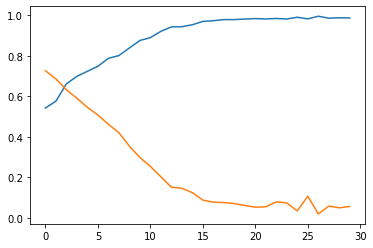

In [55]:
plt.plot(epochs, acc)
plt.plot(epochs, loss)

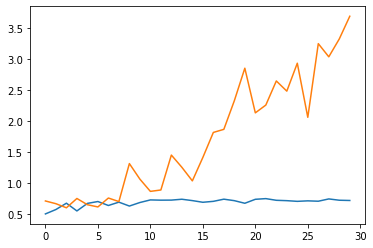

In [56]:
plt.plot(epochs, val_acc)
plt.plot(epochs, val_loss)

In [57]:
#nadmierne dopasowanie z braku zbyt malej ilosci danych
#augumentacja - przekształcanie obrazu w celu uzyskania nowej próbki danych

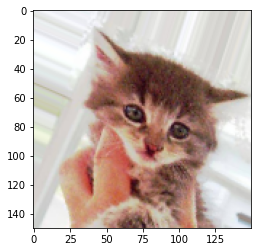

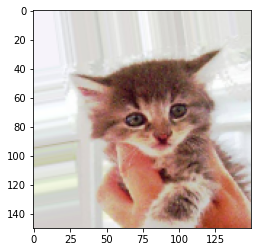

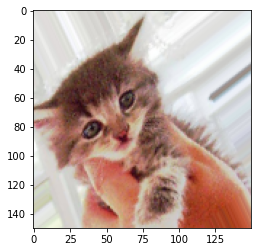

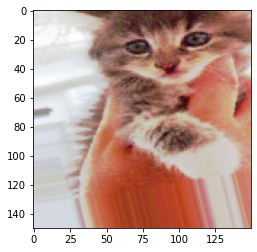

In [59]:
from tensorflow.keras.preprocessing import image

datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1, 150, 150, 3))

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [64]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (150,150), batch_size = 32, class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size = (150,150), batch_size = 32, class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=1e-4), metrics='accuracy')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 2000//32,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 1000//32
)

<ipython-input-67-74fd90754aa2>:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
62/62 [==============================] - 43s 685ms/step - loss: 0.6944 - accuracy: 0.5137 - val_loss: 0.6917 - val_accuracy: 0.5030
Epoch 2/100
62/62 [==============================] - 44s 702ms/step - loss: 0.6881 - accuracy: 0.5218 - val_loss: 0.6718 - val_accuracy: 0.5847
Epoch 3/100
62/62 [==============================] - 43s 691ms/step - loss: 0.6787 - accuracy: 0.5691 - val_loss: 0.6589 - val_accuracy: 0.6048
Epoch 4/100
62/62 [==============================] - 43s 696ms/step - loss: 0.6742 - accuracy: 0.5681 - val_loss: 0.6492 - val_accuracy: 0.6069
Epoch 5/100
62/62 [==============================] - 45s 722ms/step - loss: 0.6646 - accuracy: 0.5930 - val_loss: 0.6373 - val_accuracy: 0.6280
Epoch 6/100
62/62 [==============================] - 46s 739ms/step - loss: 0.6616 - accuracy: 0.6001 - val_loss: 0.6376 - val_accuracy: 0.6240
Epoch 7/100
62/62 [==============================] - 44s 717ms/step - loss: 0.6506 - accuracy: 0.6148 - val_loss: 0.7951 - val_accuracy:

62/62 [==============================] - 45s 718ms/step - loss: 0.4790 - accuracy: 0.7642 - val_loss: 0.4893 - val_accuracy: 0.7571
Epoch 58/100
62/62 [==============================] - 44s 715ms/step - loss: 0.4909 - accuracy: 0.7556 - val_loss: 0.4808 - val_accuracy: 0.7510
Epoch 59/100
62/62 [==============================] - 45s 729ms/step - loss: 0.4690 - accuracy: 0.7790 - val_loss: 0.5358 - val_accuracy: 0.7157
Epoch 60/100
62/62 [==============================] - 45s 718ms/step - loss: 0.4842 - accuracy: 0.7678 - val_loss: 0.4464 - val_accuracy: 0.7974
Epoch 61/100
62/62 [==============================] - 45s 723ms/step - loss: 0.4699 - accuracy: 0.7820 - val_loss: 0.4769 - val_accuracy: 0.7752
Epoch 62/100
62/62 [==============================] - 44s 716ms/step - loss: 0.4658 - accuracy: 0.7683 - val_loss: 0.4501 - val_accuracy: 0.8024
Epoch 63/100
62/62 [==============================] - 45s 723ms/step - loss: 0.4759 - accuracy: 0.7713 - val_loss: 0.4803 - val_accuracy: 0.773

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

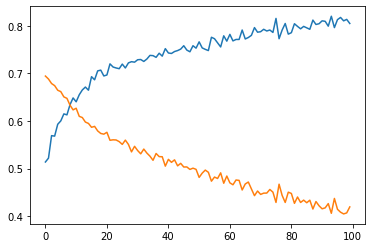

In [76]:
plt.plot(epochs, acc)
plt.plot(epochs, loss)

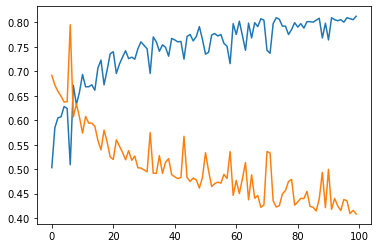

In [78]:
plt.plot(epochs, val_acc)
plt.plot(epochs, val_loss)

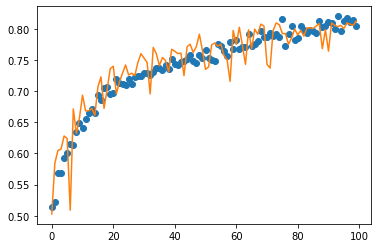

In [82]:
plt.plot(epochs, acc, 'o')
plt.plot(epochs, val_acc)

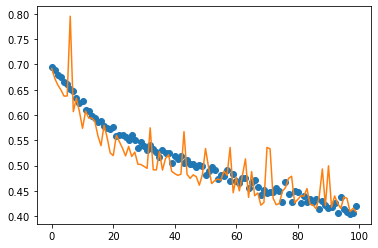

In [83]:
plt.plot(epochs, loss, 'o')
plt.plot(epochs, val_loss)

In [85]:
model.save('dogs_vs_cats.h5')